In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/out.csv')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Boston House prices dataset

**Data Set Characteristics**
Number of Instances : 506

Number of Attributes : 13

  * Attribute Information
      * CRIM  Per capita crime rate by town
      * ZN  Proportion of residential land Zoned for lots over 25,000 sq.ft.
      * INDUS. Proportion of non-retail business acres per town
      * CHAS  Charles River dummy variable (= 1 if tract bounds river; 0 therwise)
      * NOX  nitric oxides concentration (parts per 10 million)
      * RM  Average number of rooms per dwelling
      * AGE  proportion of owner-occupied units built prior to 1940
      * DIS. weighted distance to five Boston employment centres
      * RAD      index of accessibility to radial highways
      - TAX      full-value property-tax rate per $10,000
      - PTRATIO  pupil-teacher ratio by town
      - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
      - LSTAT    % lower status of the population
      - MEDV     Median value of owner-occupied homes in $1000's

  Missing attribute value None

The Boston house-price data has been used in many machine learning paapers that address regression problems.
  

In [5]:
print(data.shape)

(506, 14)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
data.duplicated().sum()

0

# EDA

In [13]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

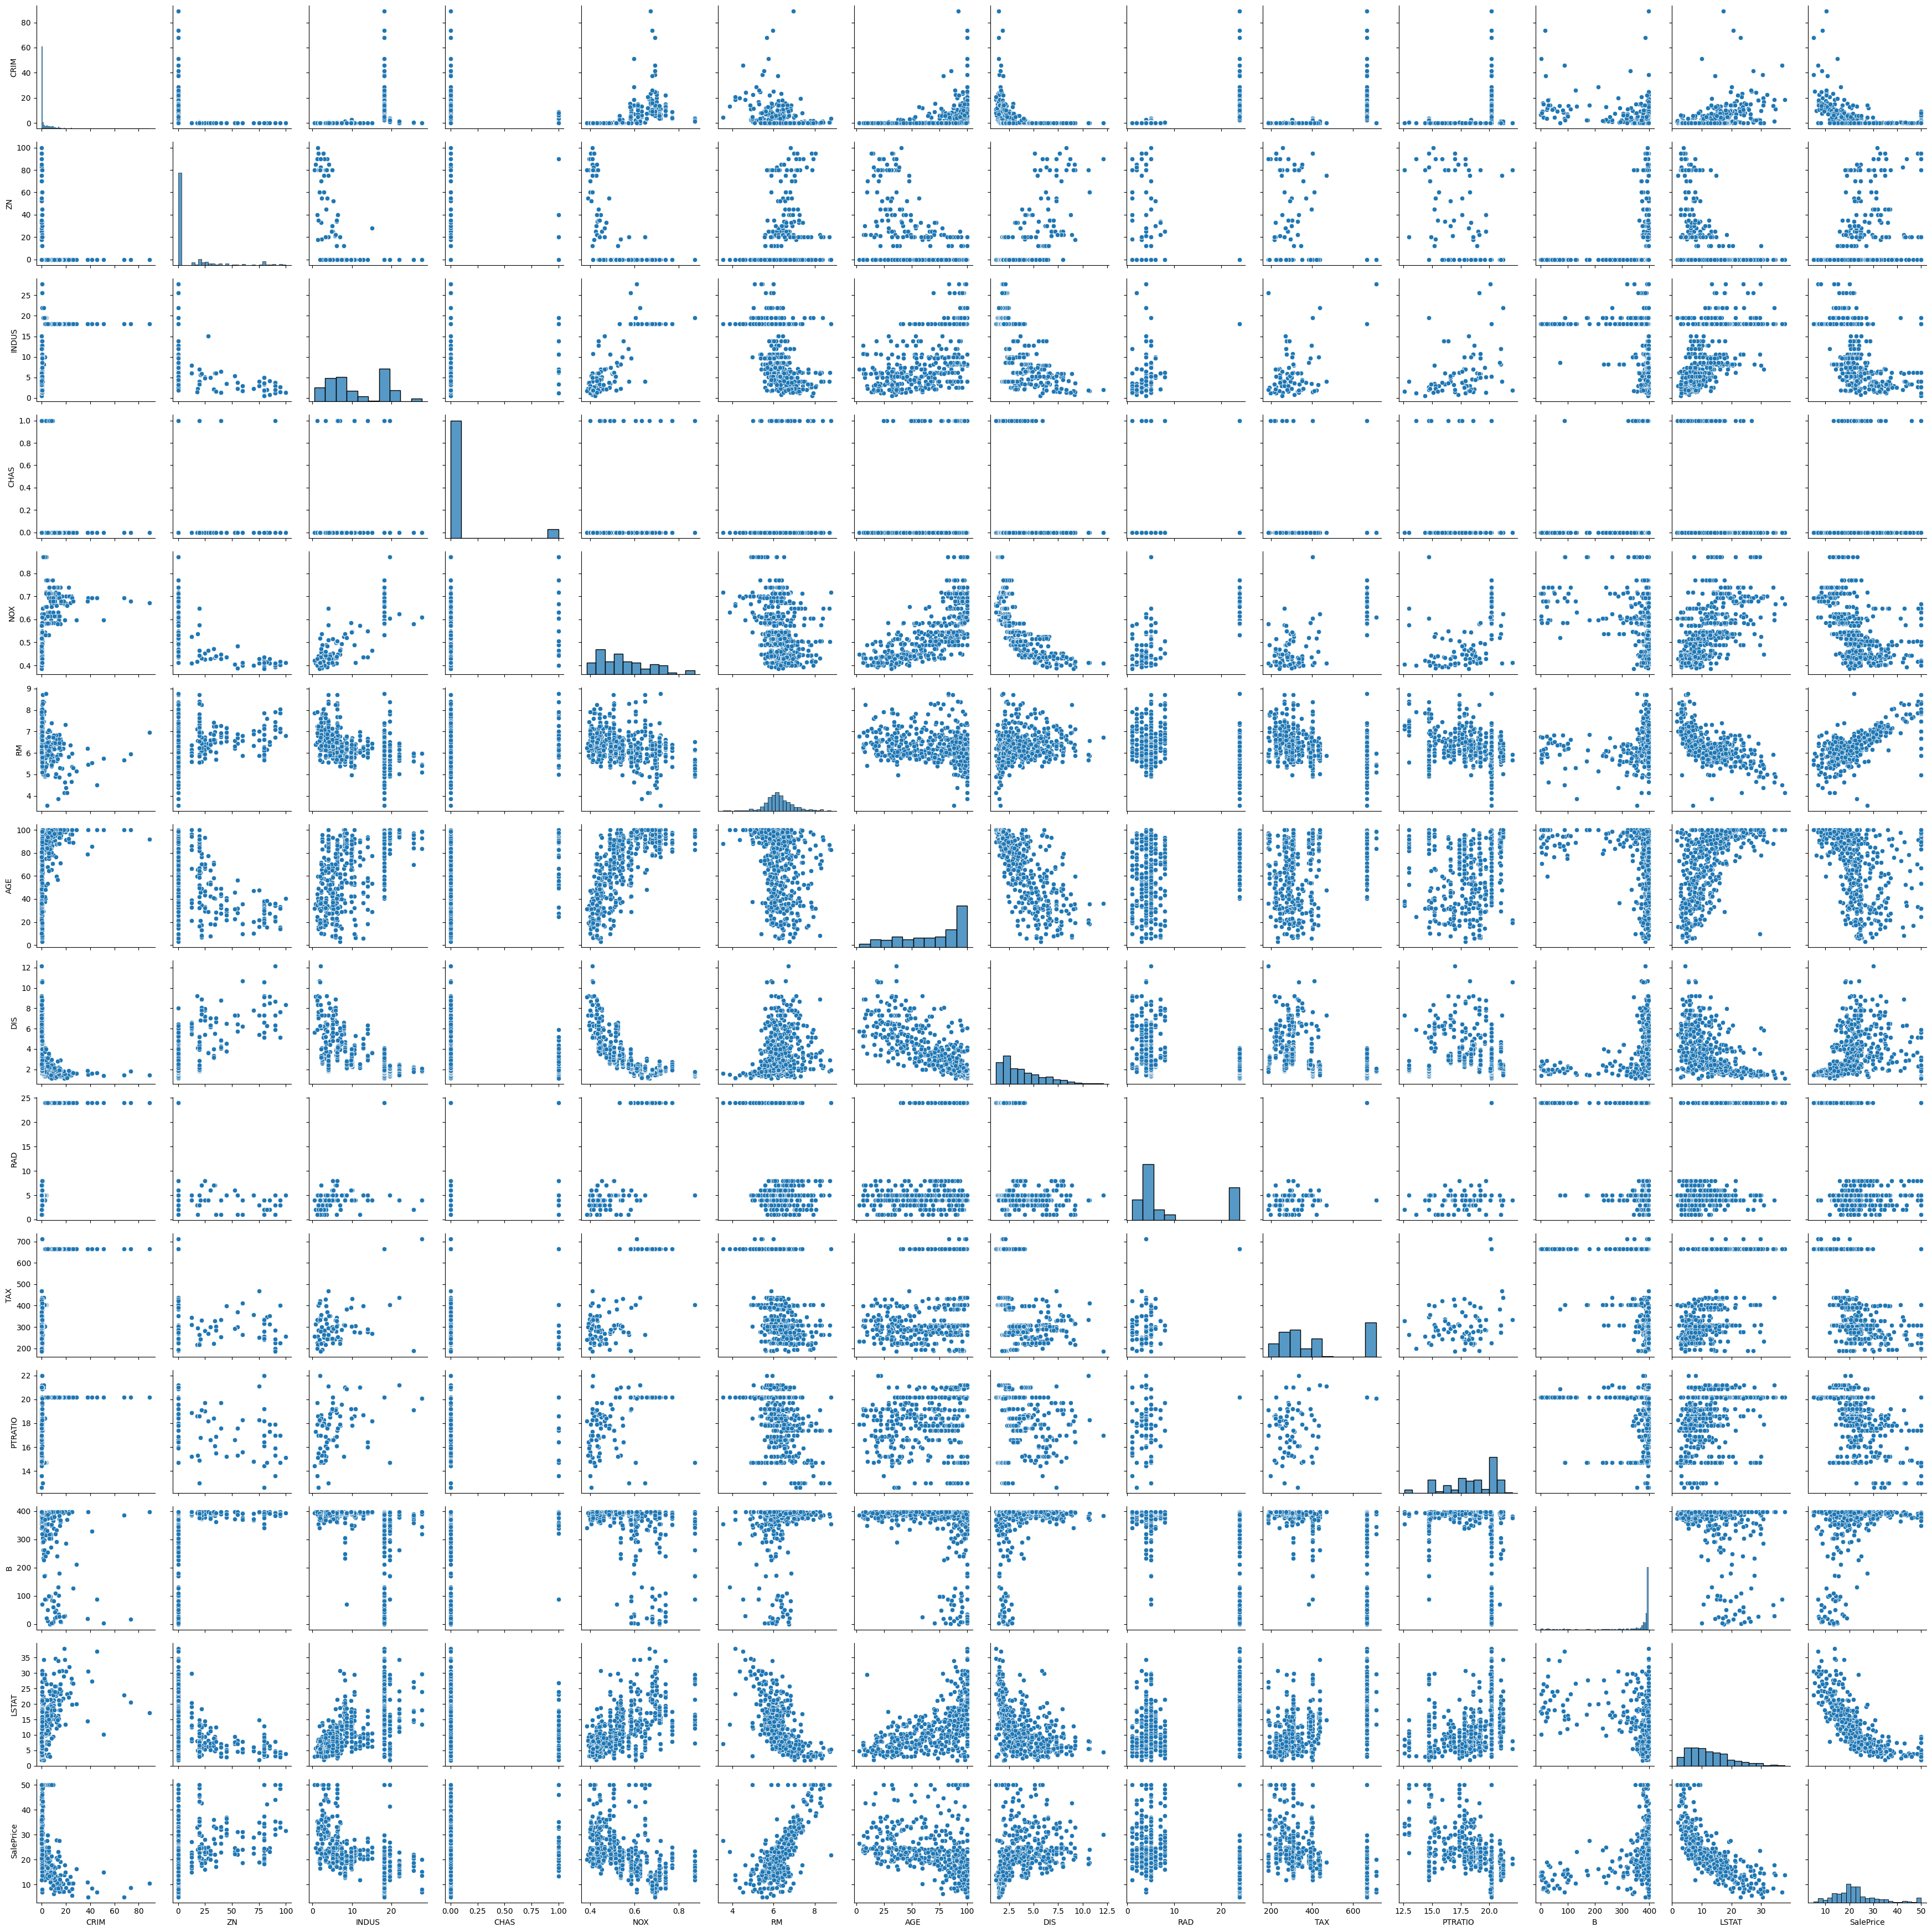

In [14]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

<ipython-input-15-e616c8a214e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


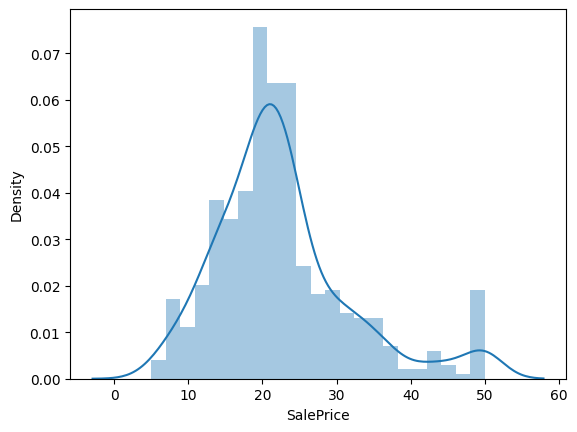

In [15]:
sns.distplot(data['SalePrice'])
plt.show()

In [16]:
print('Skewness', data['SalePrice'].skew())
print('Kurtosis', data['SalePrice'].kurt())

Skewness 1.1080984082549072
Kurtosis 1.495196944165818


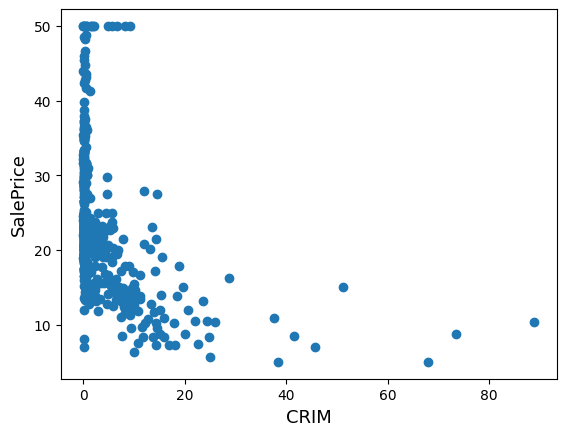

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

In [20]:
data['SalePrice'].corr(data['CRIM'])

-0.38830460858681143

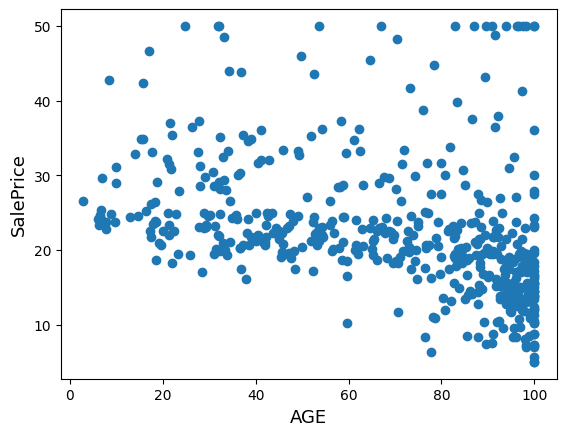

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AGE', fontsize=13)
plt.show()

In [22]:
data['SalePrice'].corr(data['AGE'])

-0.37695456500459623

<ipython-input-23-2b0d1fecf710>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm);



 mu = 22.53 and sigma = 9.19



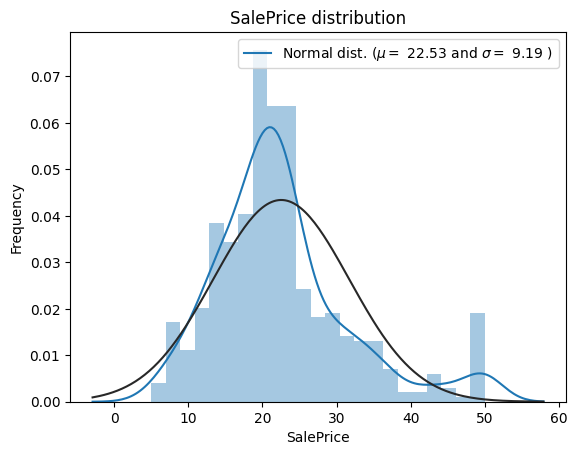

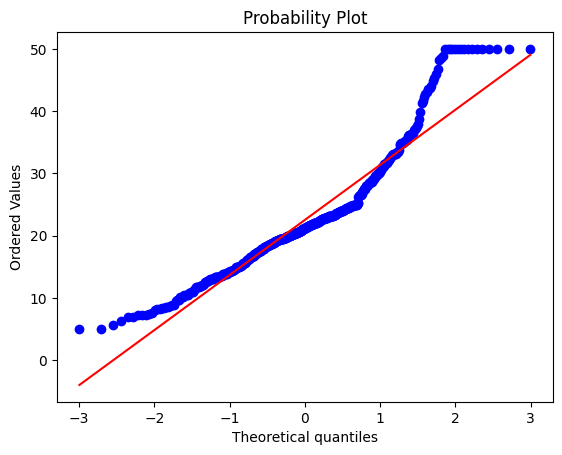

In [23]:
from scipy import stats
from scipy.stats import norm, skew # for some statistics

sns.distplot(data['SalePrice'], fit=norm);

mu, sigma = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


<ipython-input-26-c96ac91b022d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm);



 mu = 0.88 and sigma = 0.04



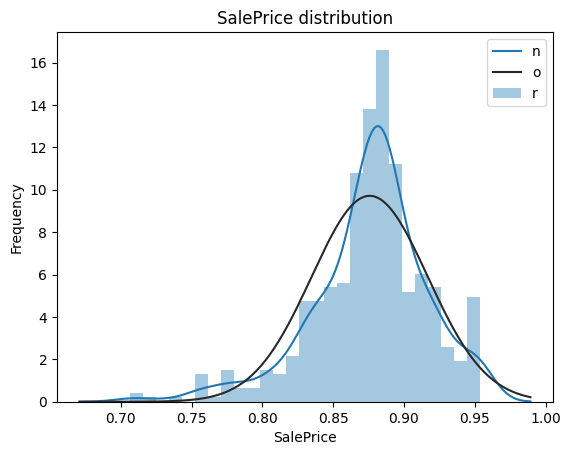

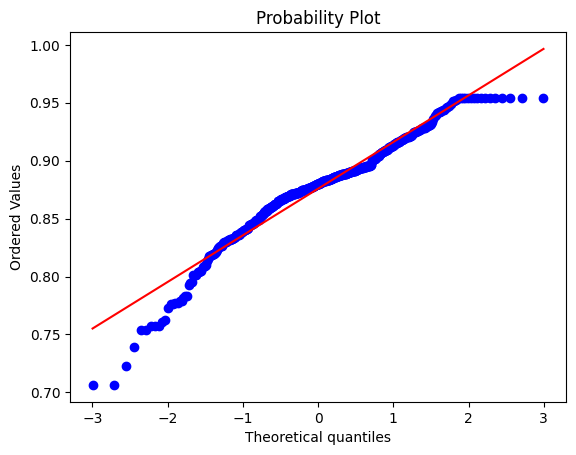

In [26]:
data['SalePrice'] = np.log1p(data['SalePrice'])

sns.distplot(data['SalePrice'], fit=norm);

mu, sigma = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend('normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma), loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

# QQ plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

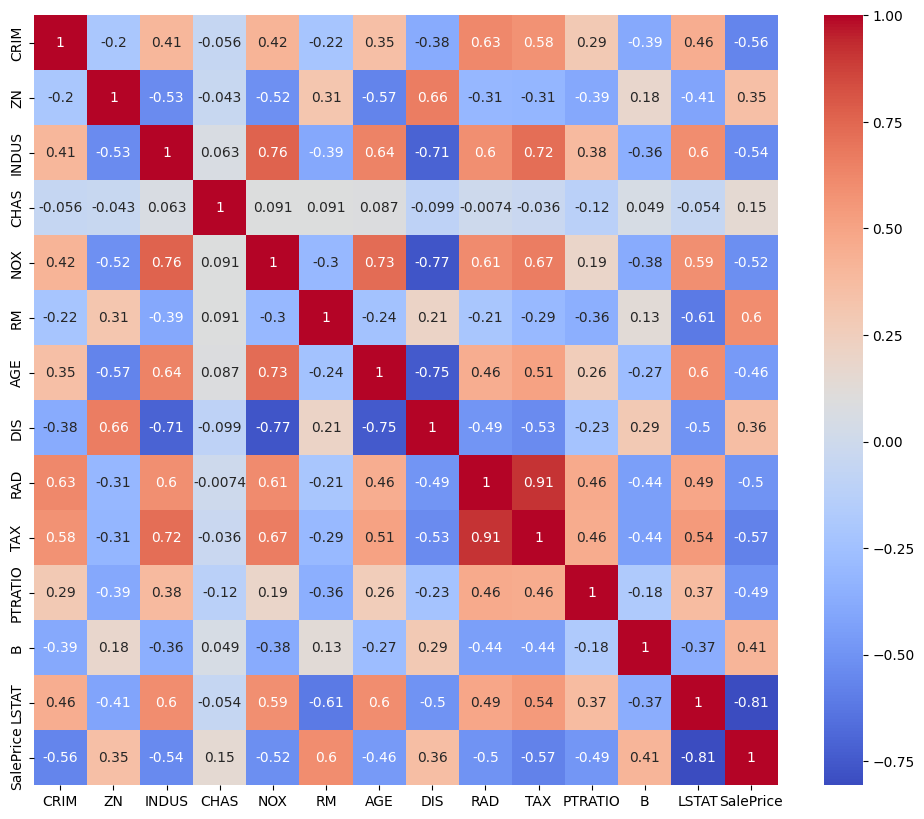

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [34]:
corr = data.corr()
cor_target = abs(corr["SalePrice"]) # absolute value of the correlation

relevant_features = cor_target[cor_target>0.3] # highly correlated features

names = [index for index, value in relevant_features.items()]  # getting the names of the features

names.remove('SalePrice') # removing target feature

print(names) # printing the features
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


# Model Building

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
predictions = lr.predict(X_test)

print("Actual value of the house:- ", y_test[0])
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  0.8918212615283341
Model Predicted Value:-  0.9052269859756843


In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

0.020350588571992827
